In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os, sys
sys.path.insert(0, '../')
from dfHelper import *
import warnings
warnings.filterwarnings('ignore')

In [32]:
def pca_per_sensor_type(subject, run, sensor):
    d = load_data_adl(subject, run, '../OpportunityUCIDataset')
    data =  get_sensor_data(d, sensor)
    data = data[data.columns[:-7]]

    #drop millisec
    data = data.drop(['MILLISEC'], axis=1)
    data = data.dropna()
    data.index = np.arange(len(data))

    #perform pca 
    from sklearn.decomposition import PCA
    model = PCA()
    model.fit(data)
    return model.explained_variance_ratio_

In [33]:
def pca_explained_var(subject, run, path):
    sensors = ["triaxial_acc", "IMU_acc", "IMU_gyro", "IMU_mag"]
    sns.set_theme(style='darkgrid', palette='Dark2', font_scale=1.5)
    fig, ax = plt.subplots(1,2, figsize=(15,5))

    i = 0
    for s in sensors:
        ex_var = pca_per_sensor_type(subject, run, s)
        print('subject {}, run {}'.format(subject, run))
        print(f'sensor {s}: {ex_var}')
        if i!=0:
            sns.lineplot(range(len(ex_var)), ex_var.cumsum(), drawstyle='steps-pre', ax=ax[0], linewidth=3, label=s)
        else:
            sns.lineplot(range(len(ex_var)), ex_var.cumsum(), drawstyle='steps-pre', ax=ax[1], linewidth=3, label ='triaxial accelerometer')
        i += 1
        fig.subplots_adjust(hspace=.0, wspace=0.)
        ax[1].set_ylim(ax[0].get_ylim())
        ax[1].set_yticklabels('')
        ax[0].set_xlabel('Number of components')
        ax[0].set_ylabel('Cumulative explained variance')
        ax[1].set_xlabel('Number of components')
        ax[0].set_xticks(range(0,5))
        ax[0].set_xticklabels(range(1,6))
        ax[1].set_xticks(range(0,11))
        fig.savefig(path, bbox_inches='tight')


## PCA for each sensor type

subject 1, run 1
sensor triaxial_acc: [0.35620947 0.33138344 0.12150156 0.08488712 0.03911433 0.02574016
 0.01328332 0.01196535 0.00772649 0.00498551 0.00320325]
subject 1, run 1
sensor IMU_acc: [0.75514314 0.12284568 0.06180865 0.03509359 0.02510894]
subject 1, run 1
sensor IMU_gyro: [0.73530598 0.16582673 0.05431766 0.02473757 0.01981207]
subject 1, run 1
sensor IMU_mag: [0.79945939 0.11108423 0.05904835 0.01719878 0.01320925]
subject 1, run 2
sensor triaxial_acc: [0.4037683  0.35435221 0.07843194 0.04678773 0.03974747 0.02689685
 0.01548604 0.01331785 0.00997523 0.00771807 0.00351832]
subject 1, run 2
sensor IMU_acc: [0.73762106 0.11737547 0.08487753 0.03627489 0.02385105]
subject 1, run 2
sensor IMU_gyro: [0.7316328  0.16417391 0.0555239  0.02604224 0.02262716]
subject 1, run 2
sensor IMU_mag: [0.74836532 0.16875493 0.04651604 0.02491488 0.01144883]
subject 1, run 3
sensor triaxial_acc: [0.44492617 0.2067912  0.12696233 0.06714435 0.05651646 0.03735449
 0.02846469 0.01102203 0.0104

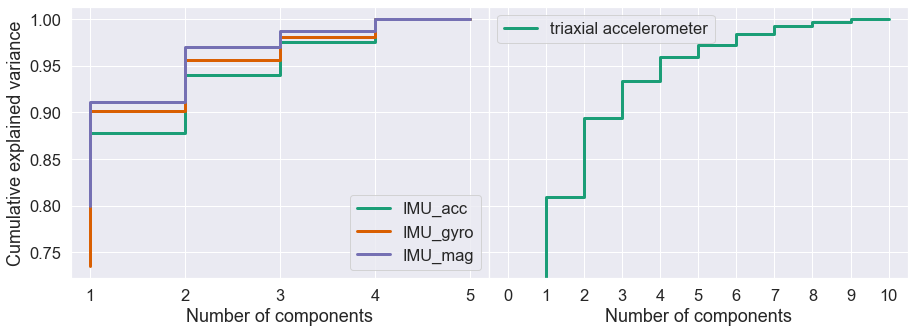

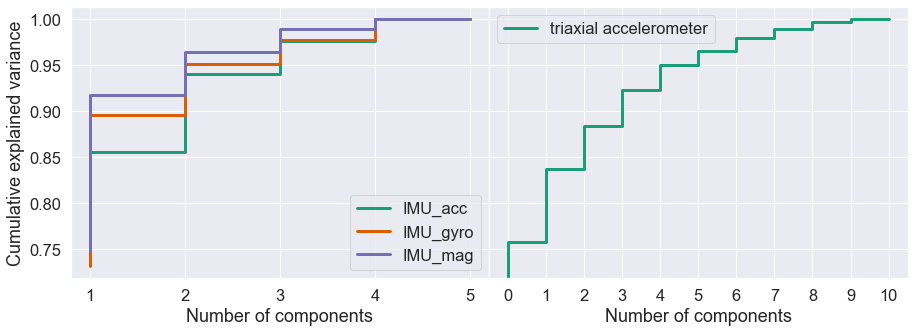

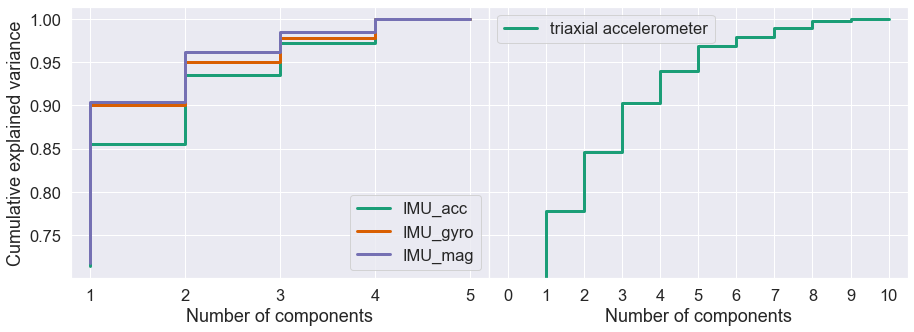

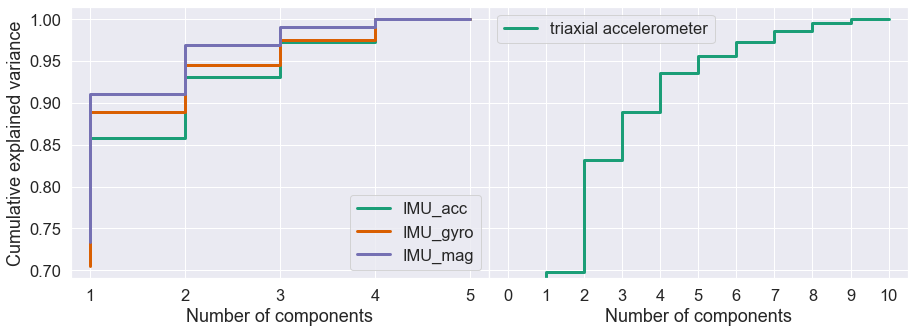

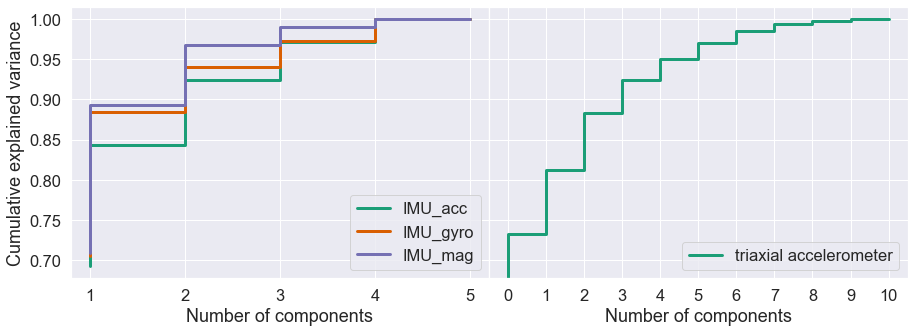

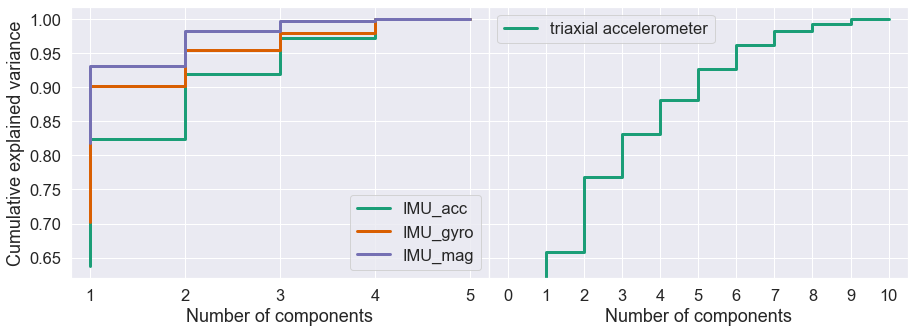

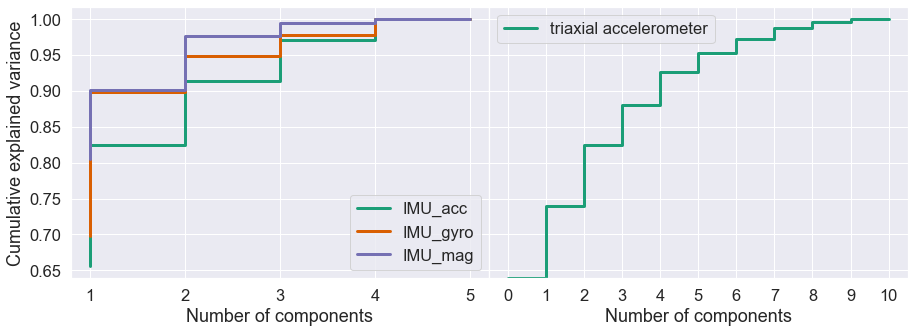

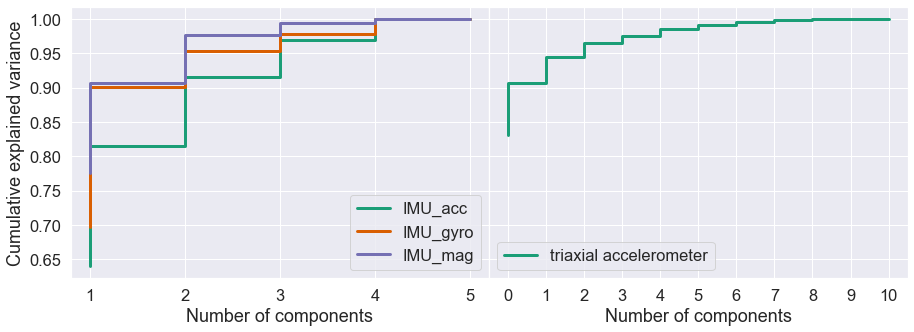

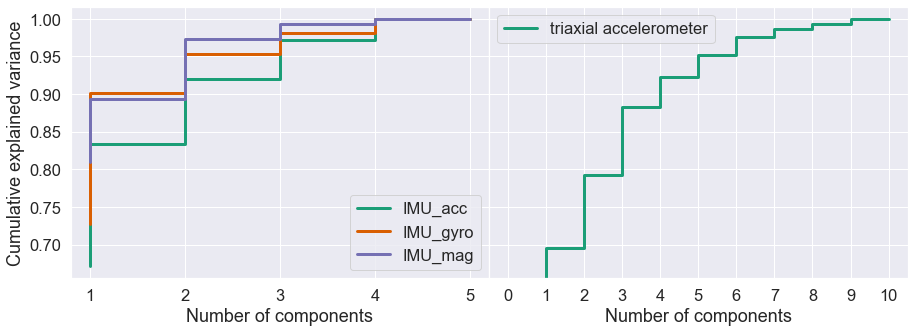

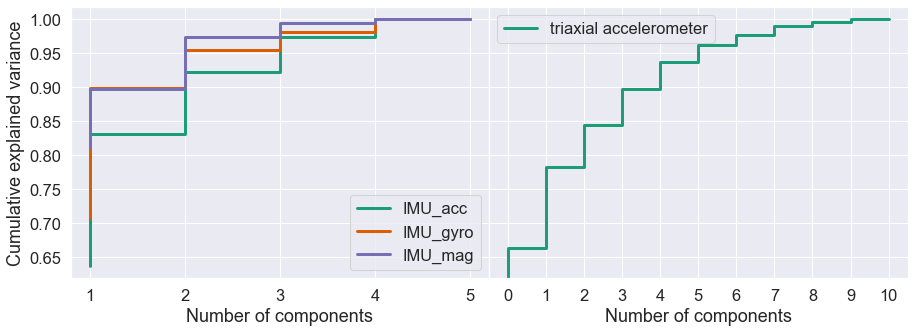

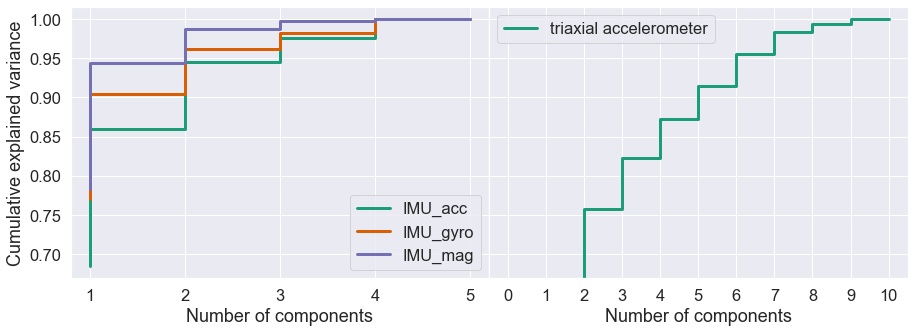

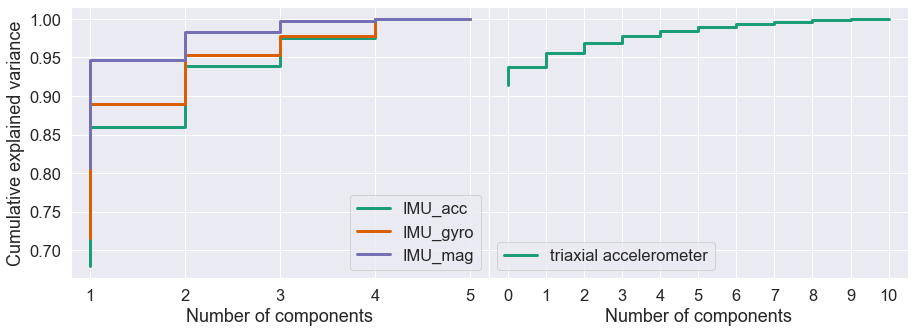

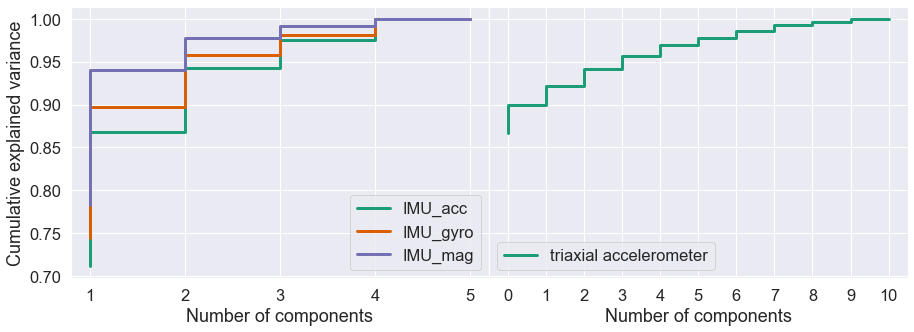

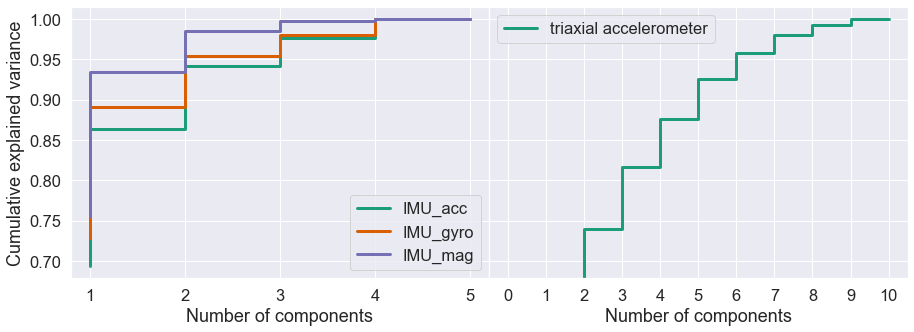

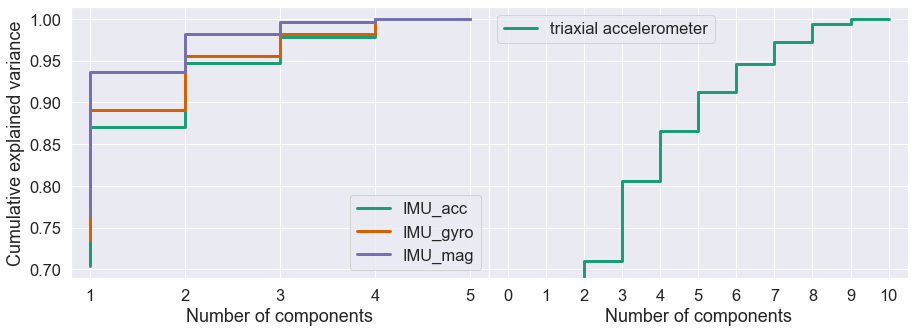

In [6]:
if not os.path.isdir("pca_results"): os.mkdir("pca_results")

subjects = range(1,4)
runs = range(1,6)
for s in subjects:
    for r in runs:
        path = "pca_results/sub_{}_run_{}_ex_var.pdf".format(s,r)
        pca_explained_var(s, r, path)

# PCA among all the sensors

In [36]:
def pca_reduced(subject, run, n_imu_acc, n_imu_gyro, n_triaxial_acc):

    imu_acc = load_data_adl(subject, run, '../OpportunityUCIDataset')
    imu_gyro = load_data_adl(subject, run, '../OpportunityUCIDataset')
    triaxial_acc = load_data_adl(subject, run, '../OpportunityUCIDataset')
    imu_acc = get_sensor_data(imu_acc, 'IMU_acc')
    imu_gyro = get_sensor_data(imu_gyro, 'IMU_gyro')
    triaxial_acc = get_sensor_data(triaxial_acc, 'triaxial_acc')

    #drop useless columns
    imu_acc = imu_acc[imu_acc.columns[:-7]]
    imu_gyro = imu_gyro[imu_gyro.columns[:-7]]
    triaxial_acc = triaxial_acc[triaxial_acc.columns[:-7]]

    #drop millisec
    imu_acc = imu_acc.drop(['MILLISEC'], axis=1)
    imu_gyro = imu_gyro.drop(['MILLISEC'], axis=1)
    triaxial_acc = triaxial_acc.drop(['MILLISEC'], axis=1)

    data = pd.concat([imu_acc[imu_acc.columns[:n_imu_acc]], 
                    imu_gyro[imu_gyro.columns[:n_imu_gyro]], 
                    triaxial_acc[triaxial_acc.columns[:n_triaxial_acc]]], axis=1)
    data = data.dropna()
    data.index = np.arange(len(data))

    #perform pca 
    from sklearn.decomposition import PCA
    model = PCA()
    model.fit(data)
    return model.explained_variance_ratio_

In [37]:
subjects = range(1,4)
runs = range(1,6)
ex_vars_all = []
ex_vars_reduced = []
for s in subjects:
    for r in runs:
        ex_var = pca_per_sensor_type(s, r, 'all')
        ex_vars_all.append(ex_var)
        ex_var = pca_reduced(s, r, 1, 1, 3)
        ex_vars_reduced.append(ex_var)


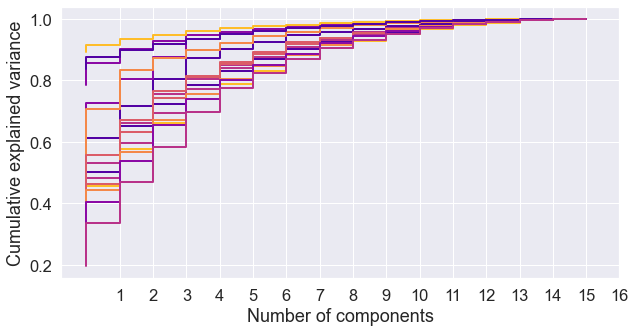

In [39]:
fig, ax = plt.subplots(figsize=(10,5))
path = "pca_results/global_ex_var.pdf".format(s,r)
sns.set_theme(style='darkgrid', palette='plasma', font_scale=1.5)
for ex_var in ex_vars_all:
        sns.lineplot(range(len(ex_var)), ex_var.cumsum(), drawstyle='steps-pre', ax=ax, linewidth=2)
        ax.set_xlabel('Number of components')
        ax.set_ylabel('Cumulative explained variance')
        ax.set_xticks(range(1,len(ex_var)+1))
fig.savefig(path, bbox_inches='tight')

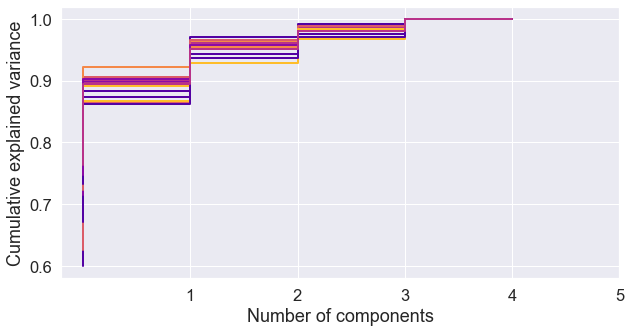

In [42]:
path = "pca_results/reduced_ex_var.pdf".format(s,r)
fig, ax = plt.subplots(figsize=(10,5))

sns.set_theme(style='darkgrid', palette='plasma', font_scale=1.5)
for ex_var in ex_vars_reduced:
        sns.lineplot(range(len(ex_var)), ex_var.cumsum(), drawstyle='steps-pre', ax=ax, linewidth=2)
        ax.set_xlabel('Number of components')
        ax.set_ylabel('Cumulative explained variance')
        ax.set_xticks(range(1,len(ex_var)+1))
fig.savefig(path, bbox_inches='tight')